In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
from deltasigma import *

## Multi-bit modulator

/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figu

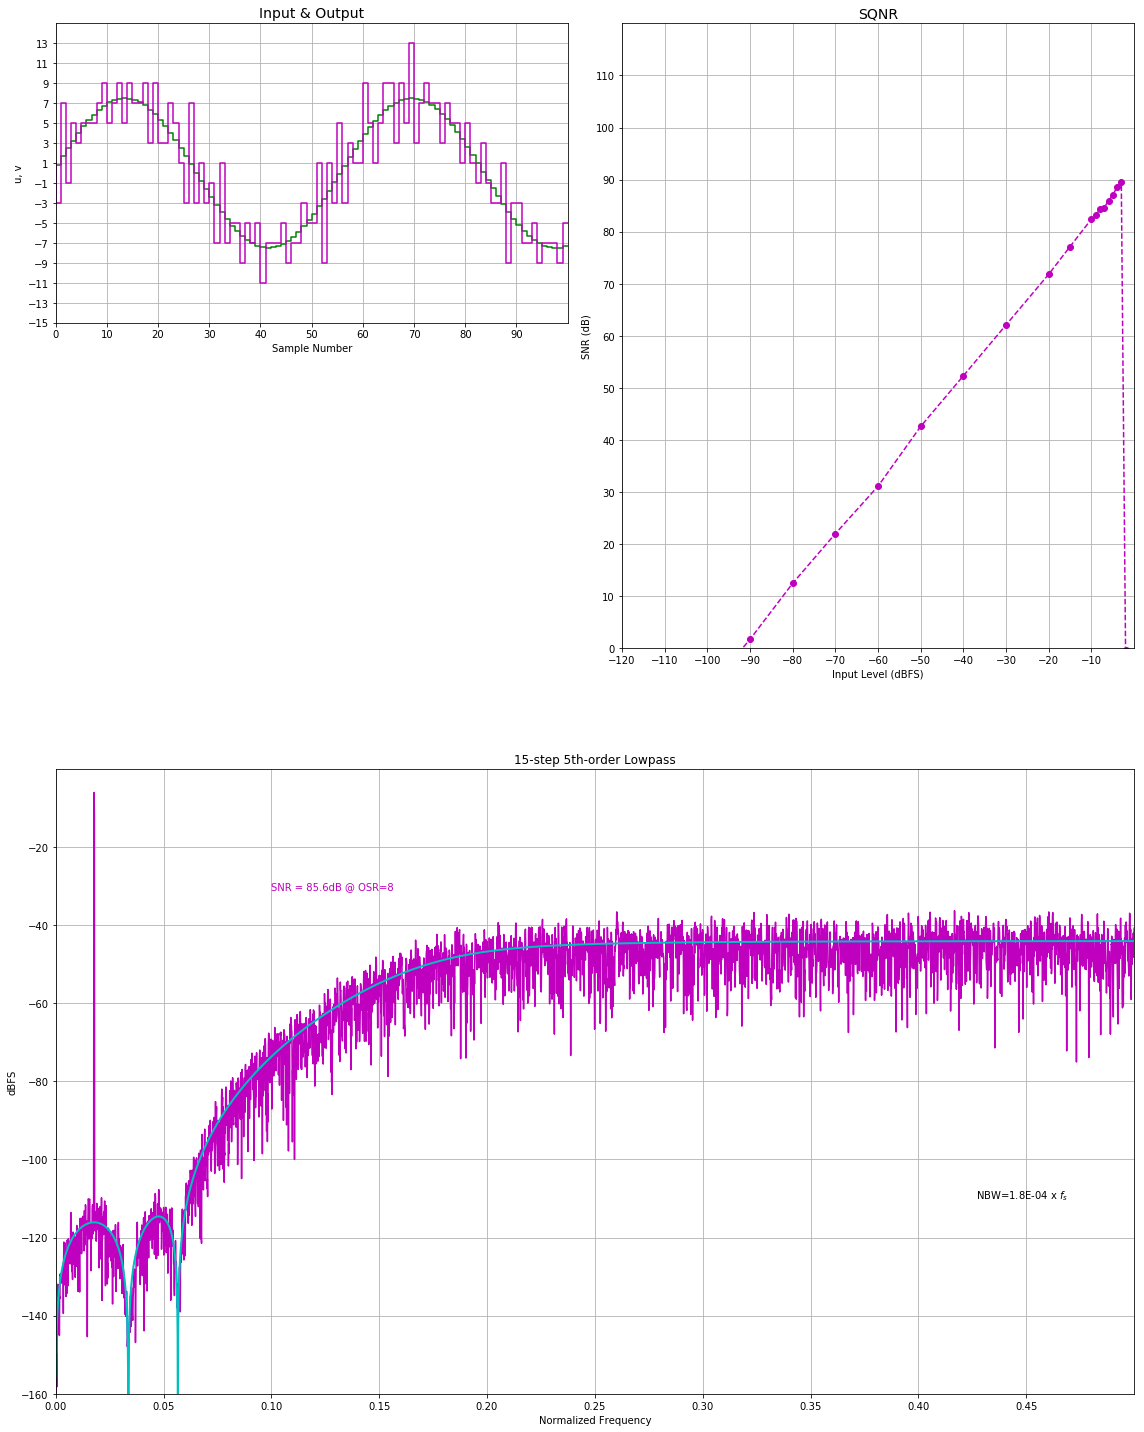

In [3]:
figure(figsize=(16, 20))
colors = ('m', 'b', 'r', 'k')
#Hinf_list = [2, 8] #[2, 8]
Hinf_list = [6] #[2, 8]
f0_list = [0.0, 1./8]
f0 = 0.0
Hinf = 12
i = -1
for col, Hinf in zip(colors, Hinf_list):
#for col, f0 in zip(colors, f0_list):
    i += 2
    OSR = 8 #8
    M = 15 #15 #16
    ORD = 5 #4
    #f0 = 1./8 #0.0
    
    H = synthesizeNTF(ORD, OSR, 1, Hinf, f0)
    #H = synthesizeChebyshevNTF(ORD, OSR, 1, Hinf)
    #H = clans(ORD,OSR,5,rmax=0.95,opt=1)
    N = 8192
    fB = int(np.ceil(N/(2.*OSR)))
    ftest = int(np.floor(2./7*fB))
    u = 0.5*M*np.sin(2*np.pi*ftest/N*np.arange(N))
    v, xn, xmax, y = simulateDSM(u, H, M + 1)
    
    subplot(int('42' + str(i)))
    t = np.arange(101)
    #t = np.arange(1001)
    step(t, u[t], 'g')
    hold(True)
    step(t, v[t], col)
    figureMagic([0, 100], 10, None, [-M, M], 2, None, None,'Input & Output')
    #figureMagic([0, 1000], 10, None, [-M, M], 2, None, None,'Input & Output')
    xlabel('Sample Number')
    ylabel('u, v')
    
    subplot(222)
    snr, amp = simulateSNR(H, OSR, None, 0., M + 1)
    plot(amp, snr,'o' + col, amp, snr, '--' + col)
    hold(True)
    figureMagic([-120, 0], 10, None, [0, 120], 10, None, None,'SQNR')
    xlabel('Input Level (dBFS)')
    ylabel('SNR (dB)')
    #pk_snr, pk_amp = peakSNR(snr, amp)
    #text(-13, pk_snr, 'peak SNR = %4.1fdB\n@ OSR = %d\n' % (pk_snr, OSR), horizontalalignment='right', color=col)
    
    subplot(212)
    f = np.linspace(0, 0.5, int(N/2.) + 1)
    spec = np.fft.fft(v*ds_hann(N))/(M*N/4)
    plot(f, dbv(spec[:int(N/2) + 1]), col)
    snr = calculateSNR(spec[2:fB + 1], ftest - 2)
    text(0.1, 10*(i - 4), 'SNR = %4.1fdB @ OSR=%d' % (snr, OSR), verticalalignment='center', color=col)
    figureMagic([0, 0.5], 0.05, None, [-160, 0], 20, None, None,'Output Spectrum')
    xlabel('Normalized Frequency')
    ylabel('dBFS')
    
    NBW = 1.5/N
    Sqq = 4*evalTF(H, np.exp(2j*np.pi*f))**2/(3.*M**2)
    hold(True)
    plot(f, dbp(Sqq*NBW), 'c', linewidth=2)
    if i == 1:
        text(0.47, -110, 'NBW=%4.1E x $f_s$ '% NBW, horizontalalignment='right')
title('15-step 5th-order Lowpass')
tight_layout()

### System version information

In [4]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib, deltasigma

Software versions
Python 3.7.11 64bit [GCC 7.5.0]
IPython 7.29.0
OS Linux 4.15.0 200 generic x86_64 with debian buster sid
numpy 1.21.2
scipy 1.7.1
matplotlib 2.2.3
deltasigma 0.2.2
Sun Dec 11 21:48:54 2022 CET

In [5]:
form='CRFBD'
a, g, b, c = realizeNTF(H, form)
print(a,g,b,c)
ABCD = stuffABCD(a,g,b,c, form)
ABCDs, umax, S = scaleABCD(ABCD, M+1)
a,g,b,c = mapABCD(ABCDs, form)
print(a,g,b,c)

/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_realizeNTF.py:243: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = -np.real(np.linalg.lstsq(T.T, L1.T)[0]).T
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_stuffABCD.py:151: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ABCD[subdiag] = c[0, dly]


[0.26844995 0.93717914 2.39377266 2.21924675 3.19382974] [0.04454745 0.12530278] [0.26844995 0.93717914 2.39377266 2.21924675 3.19382974 1.        ] [1. 1. 1. 1. 1.]
[0.13817688 0.11981686 0.16169261 0.09220671 0.28310788] [0.08431617 0.05873236] [0.13817688 0.11981686 0.16169261 0.09220671 0.28310788 1.        ] [ 0.24838379  0.52833813  0.61510556  2.13345403 11.28131692]


/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_mapABCD.py:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g = -ABCD[supdiag]


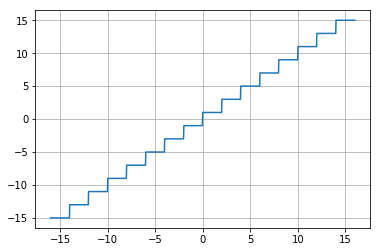

In [6]:
def quant(x):
    x += 15
    if (x<0):
        x = 0
    x = 2 * int((x+1)/2) - 15
    if (x>15):
        x = 15
    return x

x = np.linspace(-16, 16, 1001)
y = np.zeros(1001)
for i in range(0, len(x)):
    y[i] = quant(x[i])
plot(x,y)
grid()
    

In [7]:
a,g,b,c = mapABCD(ABCDs, form)

print(a,g,b,c)
a1, a2, a3, a4, a5 = a
b1, b2, b3, b4, b5, b5 = b
g1, g2 = g
c1, c2, c3, c4, c5 = c

x1d = 0
hx2d = 0
x2d = 0
x3d = 0
hx4d = 0
x4d = 0
x5d = 0

yd = 0
v2 = np.zeros(len(u))
vout = 0
i = 0

for uin in u:
    x1 = x1d + b1*uin - a1*vout
    x2 = x2d + hx2d
    x3 = x3d + x2*c2 + b3*uin - a3*vout
    hx2 = -g1*x3 + b2*uin - a2*vout + x1*c1
    x4 = x4d + hx4d
    x5 = x5d + x4*c4 + b5*uin - a5*vout
    hx4 = -g2*x5 + b4*uin - a4*vout + x3*c3
    y = c5*x5
    
    x1d = x1
    hx2d = hx2
    x2d = x2
    x3d = x3
    hx4d = hx4
    x4d = x4
    x5d = x5
    vout = quant(y)
    v2[i] = vout
    i += 1
    
print(v2)
print(v)

[0.13817688 0.11981686 0.16169261 0.09220671 0.28310788] [0.08431617 0.05873236] [0.13817688 0.11981686 0.16169261 0.09220671 0.28310788 1.        ] [ 0.24838379  0.52833813  0.61510556  2.13345403 11.28131692]
[ 1.  7.  1. ... -1.  3. -3.]
[ 1. -3.  7. ... -7.  1. -1.]


/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'u, v')

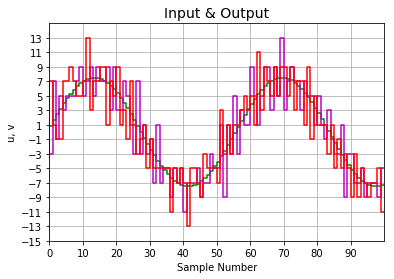

In [8]:

t = np.arange(101)
#t = np.arange(1001)
step(t, u[t], 'g')
hold(True)
step(t, v[t], col)
step(t, v2[t], 'r')
figureMagic([0, 100], 10, None, [-M, M], 2, None, None,'Input & Output')
#figureMagic([0, 1000], 10, None, [-M, M], 2, None, None,'Input & Output')
xlabel('Sample Number')
ylabel('u, v')


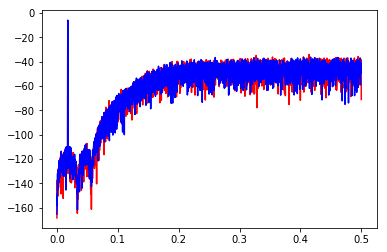

In [9]:
f = np.linspace(0, 0.5, int(N/2.) + 1)
spec = np.fft.fft(v2*ds_hann(N))/(M*N/4)
plot(f, dbv(spec[:int(N/2) + 1]), 'r')

spec = np.fft.fft(v*ds_hann(N))/(M*N/4)
plot(f, dbv(spec[:int(N/2) + 1]), 'b')

Delta sigma modulator can be implemented as error-feedback structure.
Feedback is then implemented as IIR filter He(z) = 1 - H(z).
Furthermore, He(z) can be implemented as cascade of biquad sections.


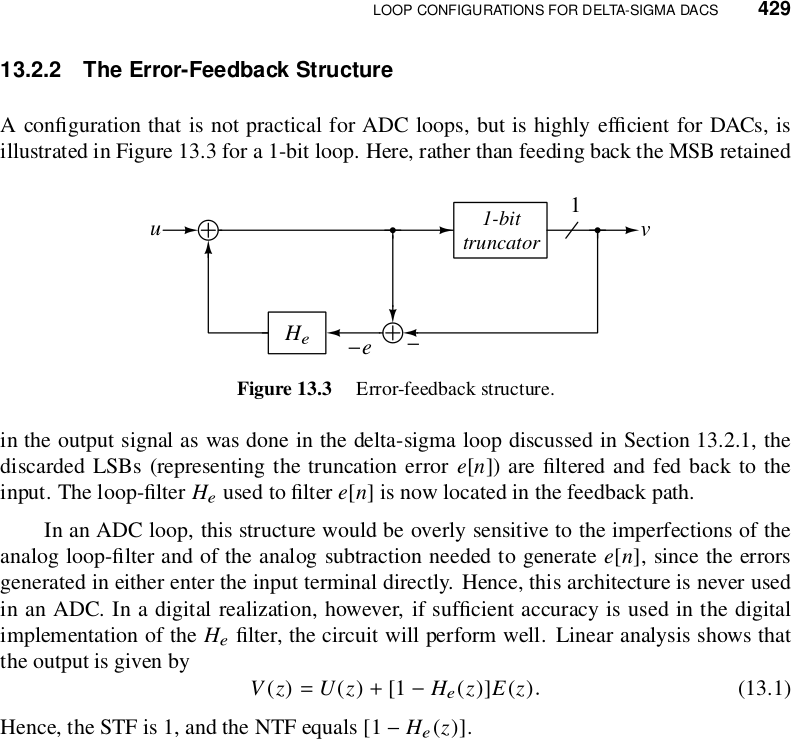



In [10]:
from sympy import *
from scipy.signal import zpk2tf
init_printing()
z = symbols('z')

a,g,b,c = mapABCD(ABCDs, form)

[ntfs, stfs] = calculateTF(ABCDs)

# ntfs contains poles, zeros and gain of noise transfer function
print("NTFS zeros")
print(ntfs[0])
print("NTFS poles")
print(ntfs[1])
print("NTFS gain")
print(ntfs[2])

ntfs_nd = zpk2tf(ntfs[0], ntfs[1], ntfs[2])
Numerator = Poly(ntfs_nd[0],z)
Denominator = Poly(ntfs_nd[1],z)
NTFS = Numerator/Denominator
print("NTFS function")
print(NTFS)

He = simplify(1-NTFS)
#He

/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_mapABCD.py:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g = -ABCD[supdiag]


NTFS zeros
[0.93734861-0.34839286j 0.93734861+0.34839286j 0.97772628-0.20988409j
 0.97772628+0.20988409j 1.        +0.j        ]
NTFS poles
[0.31190121-0.59473064j 0.31190121+0.59473064j 0.33295701-0.22746928j
 0.33295701+0.22746928j 0.3466036 +0.j        ]
NTFS gain
1.0
NTFS function
(1.0*z**5 - 4.83014977224259*z**4 + 9.4960312358213*z**3 - 9.4960312358213*z**2 + 4.8301497722426*z - 1.0)/(1.0*z**5 - 1.63632003638295*z**4 + 1.47600867451954*z**3 - 0.758401471626434*z**2 + 0.212579802387134*z - 0.0254170177863317)


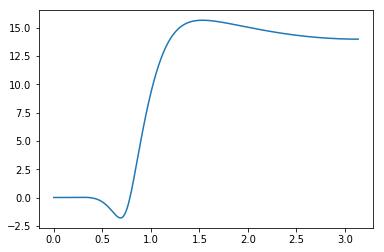

In [11]:
# Unpack He as numerator and denominator
expr_num, expr_denom = He.as_numer_denom()
num = np.array(Poly(expr_num, z).all_coeffs(), dtype=float)
denom = np.array(Poly(expr_denom, z).all_coeffs(), dtype=float)

from scipy.signal import freqz
w, heresp = freqz(num, denom)
Heresp = np.array(20*np.log10(abs(np.array(heresp))))
plt.plot(w, Heresp)

N  [ 3.19382974 -8.02002256  8.73762976 -4.61756997  0.97458298]
D  [ 1.         -1.63632004  1.47600867 -0.75840147  0.2125798  -0.02541702]
Zeros  [0.64343659+0.58613193j 0.64343659-0.58613193j 0.6121129 +0.16768317j
 0.6121129 -0.16768317j]
Poles  [0.31190121+0.59473064j 0.31190121-0.59473064j 0.33295701+0.22746928j
 0.33295701-0.22746928j 0.3466036 +0.j        ]
Gain  3.1938297358596386


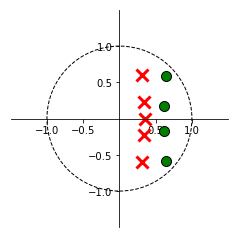

In [12]:
from scipy.signal import tf2zpk
zeros, poles, k =tf2zpk(num, denom)

print("N ", num)
print("D ", denom)
print("Zeros ", zeros)
print("Poles ", poles)
print("Gain ", k)

import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

zeros, poles, k = zplane(num, denom)

In [13]:
# Convert IIR filter to cascade of second order sections
# See https://en.wikipedia.org/wiki/Digital_biquad_filter
from scipy.signal import tf2sos
filter_sos = tf2sos(num, denom)

# IIR filter can be implemented as PARALLEL biquads
# https://dsp.stackexchange.com/questions/68672/converting-cascaded-biquads-to-parallel-biquads
# TODO

In [14]:
# Simulate IIR filter
from iir_filter import *

iir = IIR_filter(filter_sos)

v3 = np.zeros(len(u))
i = 0
y = 0
vout = quant(y)
filter_out = 0

for uin in u:
    y = uin + filter_out 
    vout = quant(y)
    e = y - vout
    filter_out = iir.filter(e)
    v3[i] = vout
    i += 1

/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/software/anaconda3/envs/deltasigma/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'u, v')

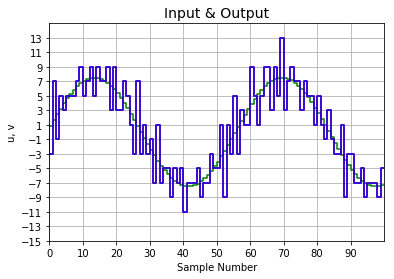

In [15]:
# Compare time domain of error feedback architecture to reference implementation
t = np.arange(101)
#t = np.arange(1001)
step(t, u[t], 'g')
hold(True)
step(t, v[t], 'r')
#step(t, v2[t], 'g')
step(t, v3[t], 'b')
figureMagic([0, 100], 10, None, [-M, M], 2, None, None,'Input & Output')
#figureMagic([0, 1000], 10, None, [-M, M], 2, None, None,'Input & Output')
xlabel('Sample Number')
ylabel('u, v')


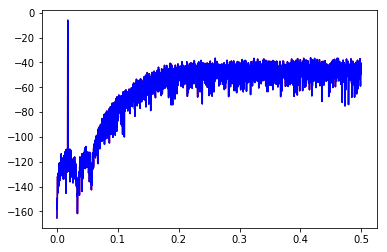

In [16]:
# Compare spectrum of error feedback architecture to reference implementation
N = 8192
f = np.linspace(0, 0.5, int(N/2.) + 1)
spec = np.fft.fft(v3*ds_hann(N))/(M*N/4)
plt.plot(f, dbv(spec[:int(N/2) + 1]), 'r')
spec = np.fft.fft(v*ds_hann(N))/(M*N/4)
plt.plot(f, dbv(spec[:int(N/2) + 1]), 'b')
